In [4]:
import pandas as pd
from sklearn import linear_model, preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate,cross_val_score
import numpy as np
import matplotlib.pyplot as plt


In [5]:
trainA = pd.read_csv('糖尿病相關資料集/實驗A/train_data.csv')
testA = pd.read_csv('糖尿病相關資料集/實驗A/test_data.csv')

trainB = pd.read_csv('糖尿病相關資料集/實驗B/train_data.csv')
testB = pd.read_csv('糖尿病相關資料集/實驗B/test_data.csv')

In [6]:
trainA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
testA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,92,62,32,126,32.0,0.085,46,0
1,4,154,72,29,126,31.3,0.338,37,0
2,0,121,66,30,165,34.3,0.203,33,1
3,3,78,70,0,0,32.5,0.270,39,0
4,2,130,96,0,0,22.6,0.268,21,0


In [8]:
# split the data into x and y
def split_xy (train, test):
    x_train = train.drop('Outcome', axis = 1)
    y_train = train.Outcome

    x_test = test.drop('Outcome', axis = 1)
    y_test = test.Outcome
    
    return x_train,y_train,x_test,y_test

In [9]:
# rescale data by MinMax
def rescale_MinMax (x_data):
    rescale_MinMax = preprocessing.MinMaxScaler()
    x_data = rescale_MinMax.fit_transform(x_data)
    
    return x_data

In [10]:
def cal_result (actul_y, pred_y):
    
    accuracy = accuracy_score(actul_y, pred_y)
    recall=recall_score(actul_y, pred_y)
    precision=precision_score(actul_y, pred_y)
    
    print('accuracy:',accuracy, '\nrecall:', recall, '\nprecision:', precision)

In [11]:
x_trainA, y_trainA, x_testA, y_testA = split_xy(trainA, testA)

In [12]:
# rescale data by MinMax
x_trainA = rescale_MinMax(x_trainA)
x_testA = rescale_MinMax(x_testA)

In [13]:
#set up model
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(x_trainA, y_trainA)

LogisticRegression()

In [14]:
#predict x from training data
pred_y_trainA = logistic_model.predict(x_trainA)

In [15]:
#confusion matrix for trainning data
confusion_matrix(y_trainA, pred_y_trainA)

array([[336,  34],
       [ 98,  99]], dtype=int64)

In [16]:
#計算 accuracy, recall, precision for training data A

cal_result(y_trainA, pred_y_trainA)

accuracy: 0.7671957671957672 
recall: 0.5025380710659898 
precision: 0.7443609022556391


In [17]:
#predict y from testing data
pred_y_testA = logistic_model.predict(x_testA)

In [18]:
#confusion matrix for trainning data
confusion_matrix(y_testA, pred_y_testA)

array([[123,   7],
       [ 31,  40]], dtype=int64)

In [19]:
#計算 accuracy, recall, precision for testing data A
cal_result(y_testA, pred_y_testA) 

accuracy: 0.8109452736318408 
recall: 0.5633802816901409 
precision: 0.851063829787234


In [20]:
#實驗B split data into xy
x_trainB, y_trainB, x_testB, y_testB = split_xy(trainB, testB)

In [21]:
# rescale data by MinMax
x_trainB = rescale_MinMax(x_trainB)
x_testB = rescale_MinMax(x_testB)

In [22]:
#set up model
logistic_model_B = linear_model.LogisticRegression()
logistic_model_B.fit(x_trainB, y_trainB)

LogisticRegression()

In [23]:
#predict x from training data
pred_y_trainB = logistic_model_B.predict(x_trainB)

In [24]:
#confusion matrix for trainning data
confusion_matrix(y_trainB, pred_y_trainB)

array([[395,  42],
       [111, 120]], dtype=int64)

In [25]:
#confusion matrix for training data
confusion_matrix(y_trainB, pred_y_trainB)

array([[395,  42],
       [111, 120]], dtype=int64)

In [26]:
#計算 accuracy, recall, precision for training data B

cal_result(y_trainB, pred_y_trainB)

accuracy: 0.7709580838323353 
recall: 0.5194805194805194 
precision: 0.7407407407407407


In [27]:
#predict y from testing data
pred_y_testB = logistic_model_B.predict(x_testB)

In [28]:
#confusion matrix for testingB data
confusion_matrix(y_testB, pred_y_testB)

array([[60,  3],
       [17, 20]], dtype=int64)

In [29]:
cal_result(y_testB, pred_y_testB)

accuracy: 0.8 
recall: 0.5405405405405406 
precision: 0.8695652173913043


In [30]:
#預測並取得預測結果機率直
pred_y_testB_prob = logistic_model_B.predict_proba(x_testB)

In [31]:
# value of auc for testing data B
auc = roc_auc_score(y_testB, pred_y_testB_prob[:,1]); print(auc)


0.8545688545688547


Text(0.5, 0, 'False Positive Rate')

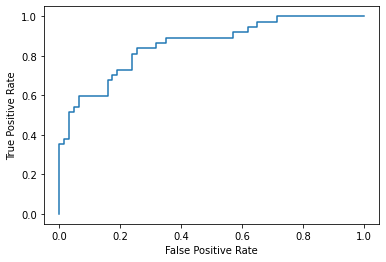

In [32]:
#plot ROC for dataB
false_positive, true_positive, thresholds = roc_curve(y_testB, pred_y_testB_prob[:,1])
plt.plot(false_positive, true_positive)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')